# <font color = 'teal'>Airbnb New York Analysis (2011 - 2019)</font>

This dataset contains information about Airbnb host listings, neighbourhoods, price, minimum nights, review counts/rate and the availability throughout the year.

Limitations: No data on customer stay duration, timeline, review score for each listing and no. of tourist attractions nearby.

---

## Acknowledgements
> Dataset taken from [Kaggle](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data).
> This is a <b>public dataset of Airbnb</b>, and the original source can be found in their website.


## Main Insights
<b>1. Which areas have the most listings and customers?</b>
> Manhattan and Brooklyn

<b>2. Which type of room is the most/least common in NYC?</b>
> Private rooms and Entire homes are the most common listings while Shared rooms are much less.

<b>3. What is the average cost for each room type and which area is the most expensive/cheap?</b>
> a) Entire homes normally cost around 160 dollars

> b) Private rooms cost around 70 dollars

> c) Shared rooms cost around 45 dollars

> Manhattan has the most expensive listings while Staten Island has the cheapest listings.

<b>4. Which areas have the busiest hosts and why?</b>
> Although Manhattan and Brooklyn have the most listings & customers, Staten Island has the busiest hosts, particularly in Silver Lake, Eltingville and Richmondtown. This is due to less competition, very low costs compared to other boroughs and less minimum night requirements which drives more customers. 

<b>5. Which area has the best/worst rental rate?</b>
> Lowest rental rate is in Manhattan (21), while best rental rate is at Staten Island (31)

<b>6. Between Manhattan and Brooklyn, which area is doing better?</b>
> Brooklyn hosts receive more customers, most notably in Manhattan Beach, Dyker Heights & Bergen Beach.

<b>7. How is the availability of each room type and borough in general?</b>
> a) For private rooms, most Staten Island listings have them available throughout the whole year compared to the other boroughs.

> b) Entire homes in NYC are generally not available for the whole year, and more towards the 6 months mark.

> c) For shared rooms, Brooklyn & Queens have them available through out most of the year, while Staten Island and Bronx have them for only a couple months in a year.

<b>8. Is there any particular difference in minimum nights for each borough?</b>
> Staten Island listings tend to have very low minimum night requirements, which means that many vistors do not have to stay for long.

<b>9. How is the review rate for hosts for each room type and area?</b>
> a) Althoough Manhattan has alot of private rooms & entire homes available, many people tend to opt for the shared rooms, possibly due to lower cost and travelling alone.

> b) Entire homes seem to be the go to option for most visitors in Staten Island and Bronx.

<b>10. Is there a significant difference between reviews_per_month for hosts of 'shared rooms' and 'private rooms'?</b>
> There is no significant difference for reviews_per_month between hosts of 'shared rooms' and 'private rooms' (with a 95% confidence)


---

In [1]:
#import the necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import folium as fl
from folium.plugins import HeatMap
from folium.plugins import PolyLineTextPath

%matplotlib inline
sns.set(rc = {'figure.figsize': (20,8)}, style = 'whitegrid', palette = 'Set2')

### 1. Data Load & Exploration

In [5]:
# load airbnb dataset
df = pd.read_csv('AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [6]:
df.shape

(48895, 16)

In [7]:
# explore the 'calculated_host_listings_count' column
df.loc[(df['host_name'] == 'John') & (df['host_id'] == 2787)]

## indicates that how many different housings/options do each host have available

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
10372,7937553,Riomaggiore Room. Queen Bedroom in Bklyn Townh...,2787,John,Brooklyn,Bensonhurst,40.60951,-73.97622,Private room,99,1,21,2018-10-27,0.50,6,153
13583,10160215,Torre del Lago Room.,2787,John,Brooklyn,Gravesend,40.60755,-73.97410,Private room,79,1,17,2019-06-26,0.40,6,174
13688,10267242,Cinque Terre Room. Clean and Quiet Queen Bedroom,2787,John,Brooklyn,Gravesend,40.60810,-73.97541,Private room,149,1,24,2019-05-11,0.64,6,180
13963,10593675,"La Spezia room. Clean, quiet and comfortable bed",2787,John,Brooklyn,Bensonhurst,40.60951,-73.97642,Shared room,79,1,15,2018-09-29,0.43,6,180
21556,17263207,Brooklyn home. Comfort and clean. Liguria room.,2787,John,Brooklyn,Bensonhurst,40.60877,-73.97382,Private room,49,1,19,2019-06-08,0.70,6,360


In [8]:
# explore the categories for 'neighbourhood_group'
df.neighbourhood_group.value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [9]:
# explore the categories for 'neighbourhood'
df.neighbourhood.value_counts()

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Woodrow                  1
Richmondtown             1
Fort Wadsworth           1
Willowbrook              1
New Dorp                 1
Name: neighbourhood, Length: 221, dtype: int64

In [10]:
# explore the categories for 'room_type'
df.room_type.value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

In [11]:
# remove the first two columns for now as it is not needed
df.drop(columns = ['id', 'name'], axis = 1, inplace = True)
df.rename(columns = {
    'calculated_host_listings_count': 'host_listings_count',
    'number_of_reviews': 'reviews_count'
}, inplace = True)
df.head()

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,reviews_count,last_review,reviews_per_month,host_listings_count,availability_365
0,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [12]:
# check for duplicate rows
df.duplicated().value_counts()

## no duplicate rows

False    48895
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   host_id              48895 non-null  int64  
 1   host_name            48874 non-null  object 
 2   neighbourhood_group  48895 non-null  object 
 3   neighbourhood        48895 non-null  object 
 4   latitude             48895 non-null  float64
 5   longitude            48895 non-null  float64
 6   room_type            48895 non-null  object 
 7   price                48895 non-null  int64  
 8   minimum_nights       48895 non-null  int64  
 9   reviews_count        48895 non-null  int64  
 10  last_review          38843 non-null  object 
 11  reviews_per_month    38843 non-null  float64
 12  host_listings_count  48895 non-null  int64  
 13  availability_365     48895 non-null  int64  
dtypes: float64(3), int64(6), object(5)
memory usage: 5.2+ MB


In [14]:
# convert the date field
df['last_review'] = pd.to_datetime(df['last_review'], format = '%Y-%m-%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   host_id              48895 non-null  int64         
 1   host_name            48874 non-null  object        
 2   neighbourhood_group  48895 non-null  object        
 3   neighbourhood        48895 non-null  object        
 4   latitude             48895 non-null  float64       
 5   longitude            48895 non-null  float64       
 6   room_type            48895 non-null  object        
 7   price                48895 non-null  int64         
 8   minimum_nights       48895 non-null  int64         
 9   reviews_count        48895 non-null  int64         
 10  last_review          38843 non-null  datetime64[ns]
 11  reviews_per_month    38843 non-null  float64       
 12  host_listings_count  48895 non-null  int64         
 13  availability_365     48895 non-

In [15]:
#inspect the summary of numerical columns
df.describe().round(2)

##need to look further into max of 'minimum_nights' and min of 'availability_365'

,host_id,latitude,longitude,price,minimum_nights,reviews_count,reviews_per_month,host_listings_count,availability_365
count,4.889500e+04,48895.00,48895.00,48895.00,48895.00,48895.00,38843.00,48895.00,48895.00
mean,6.762001e+07,40.73,-73.95,152.72,7.03,23.27,1.37,7.14,112.78
std,7.861097e+07,0.05,0.05,240.15,20.51,44.55,1.68,32.95,131.62
min,2.438000e+03,40.50,-74.24,0.00,1.00,0.00,0.01,1.00,0.00
25%,7.822033e+06,40.69,-73.98,69.00,1.00,1.00,0.19,1.00,0.00
50%,3.079382e+07,40.72,-73.96,106.00,3.00,5.00,0.72,1.00,45.00
75%,1.074344e+08,40.76,-73.94,175.00,5.00,24.00,2.02,2.00,227.00
max,2.743213e+08,40.91,-73.71,10000.00,1250.00,629.00,58.50,327.00,365.00


In [16]:
#check for null values
df.isna().sum()

host_id                    0
host_name                 21
neighbourhood_group        0
neighbourhood              0
latitude                   0
longitude                  0
room_type                  0
price                      0
minimum_nights             0
reviews_count              0
last_review            10052
reviews_per_month      10052
host_listings_count        0
availability_365           0
dtype: int64

### 2. Data Cleaning & Processing

In [17]:
# check if we can impute the missing host_name values from their other listings
df.loc[df['host_id'].isin(df[df['host_name'].isna()].host_id)]

## seems like those who have multiple listings, still have the host_name missing for those too. We assume its for privacy. 'host_id' column can be used instead for identification

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,reviews_count,last_review,reviews_per_month,host_listings_count,availability_365
360,526653,NaN,Queens,Queens Village,40.72413,-73.76133,Private room,50,1,43,2019-07-08,0.45,1,88
2700,7779204,NaN,Brooklyn,Flatbush,40.64965,-73.96154,Entire home/apt,100,30,49,2017-01-02,0.69,1,342
5745,919218,NaN,Manhattan,Harlem,40.80606,-73.95061,Private room,86,3,34,2019-05-23,1.00,1,359
6075,23077718,NaN,Brooklyn,Crown Heights,40.67512,-73.96146,Private room,50,1,0,NaT,NaN,1,0
6582,24576978,NaN,Brooklyn,Greenpoint,40.72035,-73.95355,Entire home/apt,195,1,1,2015-10-20,0.02,1,0
8163,32722063,NaN,Brooklyn,East Flatbush,40.65263,-73.93215,Entire home/apt,85,2,182,2019-06-19,3.59,2,318
8257,33134899,NaN,Brooklyn,Bushwick,40.70146,-73.92792,Private room,37,1,1,2015-07-01,0.02,1,0
8852,32722063,NaN,Brooklyn,East Flatbush,40.64345,-73.93643,Entire home/apt,100,2,157,2019-06-19,3.18,2,342
9138,5162530,NaN,Brooklyn,Williamsburg,40.71838,-73.95630,Entire home/apt,145,1,0,NaT,NaN,1,0
9817,39608626,NaN,Manhattan,Harlem,40.82929,-73.94182,Private room,28,1,1,2015-08-01,0.02,1,0


In [18]:
# drop 'host_name' column as we can use 'host_id' for identification/uniqueness

df.drop(columns = 'host_name', axis = 1, inplace = True)

In [19]:
# investigate on null values for 'last_review' & 'reviews_per_month'
df[(df['last_review'].isna()) | (df['reviews_per_month'].isna())]

## we can see that the rows that have null for 'last_review', also has null for 'reviews_per_month'

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,reviews_count,last_review,reviews_per_month,host_listings_count,availability_365
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365
19,17985,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,NaT,NaN,2,249
26,26394,Manhattan,Inwood,40.86754,-73.92639,Private room,80,4,0,NaT,NaN,1,0
36,7355,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,NaT,NaN,1,365
38,45445,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,1,0,NaT,NaN,1,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaT,NaN,2,9
48891,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaT,NaN,2,36
48892,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaT,NaN,1,27
48893,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaT,NaN,6,2


In [20]:
# check if all these entries have 0 reviews
df[(df['last_review'].isna()) | (df['reviews_per_month'].isna())].reviews_count.value_counts()

## reason for having NA, is because these listings never got a single review yet

0    10052
Name: reviews_count, dtype: int64

In [21]:
# for NA 'reviews_per_month', we can impute it with '0' as these listings didnt get any reviews yet
df.reviews_per_month.fillna(value = 0, inplace = True)

In [22]:
df.last_review.min()

Timestamp('2011-03-28 00:00:00')

In [23]:
df.last_review.max()

Timestamp('2019-07-08 00:00:00')

In [24]:
# to deal with NA in 'last_review', we change the column to a categorical variable (by year), and those that have NA will be categorised as 'Never', as they did not get any reviews yet
df.last_review = df.last_review.dt.year.astype('object')
df.last_review.fillna(value = 'Never', inplace = True)

In [25]:
# check 'last_review' categories
df.last_review.value_counts()

2019.0    25209
Never     10052
2018.0     6050
2017.0     3205
2016.0     2707
2015.0     1393
2014.0      199
2013.0       48
2012.0       25
2011.0        7
Name: last_review, dtype: int64

In [26]:
# confirm all null values are dealt with
df.isna().sum()

host_id                0
neighbourhood_group    0
neighbourhood          0
latitude               0
longitude              0
room_type              0
price                  0
minimum_nights         0
reviews_count          0
last_review            0
reviews_per_month      0
host_listings_count    0
availability_365       0
dtype: int64

In [27]:
df.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,reviews_count,last_review,reviews_per_month,host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018.0,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019.0,0.38,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,Never,0.00,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019.0,4.64,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018.0,0.10,1,0


In [28]:
df.describe()
## need to look further into max of 'minimum_nights' and min of 'availability_365'

,host_id,latitude,longitude,price,minimum_nights,reviews_count,reviews_per_month,host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [29]:
df.availability_365.value_counts()
## 0 days availability can possibly refer to the listing not being available at the moment, so we can keep this data

0      17533
365     1295
364      491
1        408
89       361
       ...  
195       26
196       24
183       24
181       23
202       20
Name: availability_365, Length: 366, dtype: int64

In [30]:
#check values for 'minimum_nights'
df.minimum_nights.value_counts()

1      12720
2      11696
3       7999
30      3760
4       3303
       ...  
85         1
182        1
39         1
87         1
36         1
Name: minimum_nights, Length: 109, dtype: int64

C:\Users\Admin\new anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='minimum_nights'>

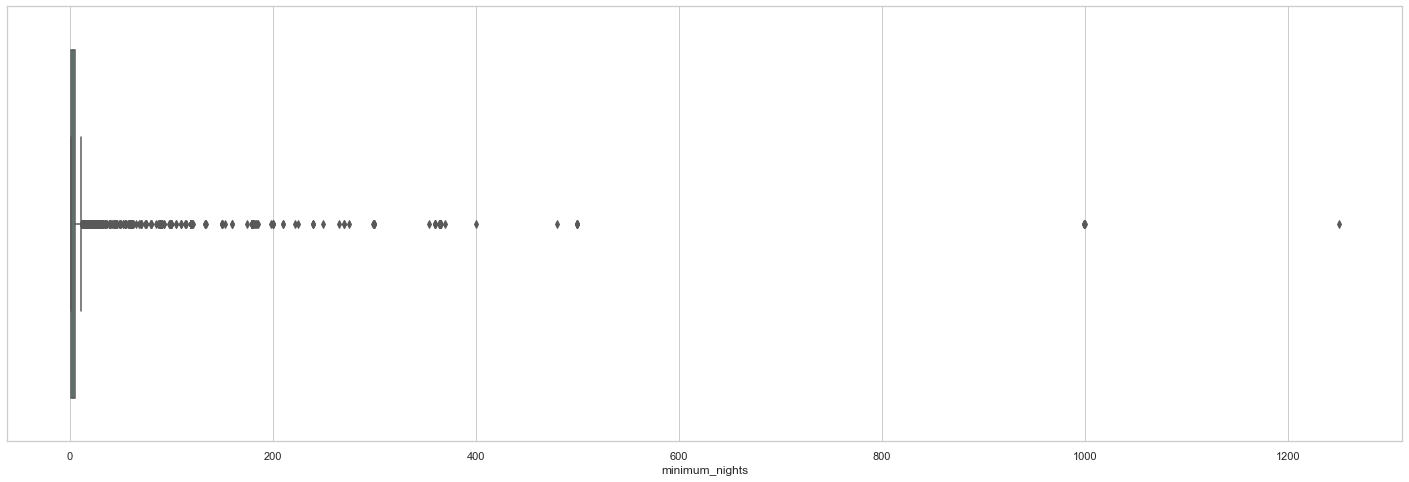

In [31]:
plt.figure(figsize = (25, 8))
sns.boxplot(df['minimum_nights'])

## can see some extreme outliers

In [32]:
#check how many listings have minimum nights set to more than a year
df.loc[df['minimum_nights'] > 365]

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,reviews_count,last_review,reviews_per_month,host_listings_count,availability_365
1305,2798644,Brooklyn,Bushwick,40.70202,-73.92402,Entire home/apt,115,370,6,2018.0,0.09,1,365
2854,6676776,Manhattan,Battery Park City,40.71239,-74.01620,Entire home/apt,400,1000,0,Never,0.00,1,362
5767,17550546,Manhattan,Greenwich Village,40.73293,-73.99782,Entire home/apt,180,1250,2,2014.0,0.03,1,365
7355,3680008,Queens,Long Island City,40.75104,-73.93863,Entire home/apt,134,500,30,2018.0,0.57,1,90
8014,10720264,Manhattan,Harlem,40.82135,-73.95521,Entire home/apt,75,500,0,Never,0.00,1,362
10829,43945071,Queens,Long Island City,40.74654,-73.95778,Entire home/apt,199,480,0,Never,0.00,1,365
11193,8996336,Brooklyn,Crown Heights,40.67255,-73.94914,Private room,50,500,10,2016.0,0.22,1,365
13404,2697686,Manhattan,Harlem,40.82915,-73.94034,Entire home/apt,99,999,2,2018.0,0.07,1,42
14285,2228137,Brooklyn,Kensington,40.64779,-73.97956,Private room,45,500,0,Never,0.00,1,358
15946,16476167,Manhattan,Midtown,40.74513,-73.98475,Entire home/apt,250,366,0,Never,0.00,1,365


In [33]:
# Given that having minimum nights as more than 365 days is extremely rare and could be invalid at times as well, we can remove them. Furthermore, its only a few entries, so it should not affect our data.
# Therefore, we will only consider listings that have minimum nights set to a year or less.
df = df.loc[df['minimum_nights'] <= 365]

# resetting the count for listings, as a few rows were removed
df['host_listings_count'] = df.groupby('host_id')['host_id'].transform('count')
# rest index as well
df.reset_index(inplace = True)

C:\Users\Admin\new anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='minimum_nights'>

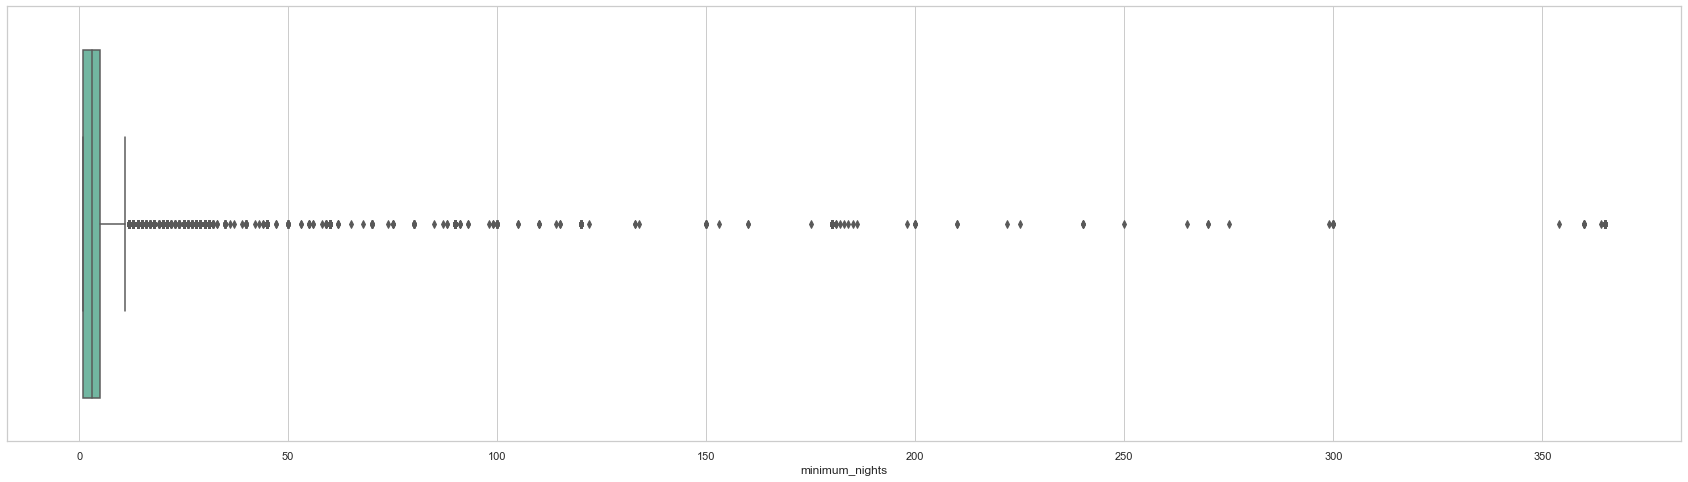

In [34]:
# extreme outliers have been removed, while the moderate outliers are kept, as they are valid but uncommon cases
plt.figure(figsize = (30, 8))
sns.boxplot(df['minimum_nights'])

In [35]:
# now things look better
df.describe().round(2)

,index,host_id,latitude,longitude,price,minimum_nights,reviews_count,reviews_per_month,host_listings_count,availability_365
count,48881.00,4.888100e+04,48881.00,48881.00,48881.00,48881.00,48881.00,48881.00,48881.00,48881.00
mean,24449.13,6.762783e+07,40.73,-73.95,152.73,6.84,23.28,1.09,7.15,112.73
std,14114.46,7.861435e+07,0.05,0.05,240.18,16.45,44.56,1.60,32.96,131.59
min,0.00,2.438000e+03,40.50,-74.24,0.00,1.00,0.00,0.00,1.00,0.00
25%,12227.00,7.822898e+06,40.69,-73.98,69.00,1.00,1.00,0.04,1.00,0.00
50%,24450.00,3.080195e+07,40.72,-73.96,106.00,3.00,5.00,0.37,1.00,45.00
75%,36672.00,1.074344e+08,40.76,-73.94,175.00,5.00,24.00,1.58,2.00,227.00
max,48894.00,2.743213e+08,40.91,-73.71,10000.00,365.00,629.00,58.50,327.00,365.00


### 3. Data Engineering & Exploratory Data Analysis (EDA)

In [36]:
df.minimum_nights.value_counts().sort_values(ascending = False).head(10)

1     12720
2     11696
3      7999
30     3760
4      3303
5      3034
7      2058
6       752
14      562
10      483
Name: minimum_nights, dtype: int64

In [37]:
# create a new column, for categorising the minimum nights

min_night_type = []

for row in range(len(df)):
    if df.minimum_nights[row] <= 5:
        min_night_type.append('1-5 days')
    elif df.minimum_nights[row] <= 14:
        min_night_type.append('1-2 weeks')
    elif df.minimum_nights[row] <= 90:
        min_night_type.append('1-3 months')
    elif df.minimum_nights[row] <= 180:
        min_night_type.append('4-6 months')
    else:
        min_night_type.append('7-12 months')   

In [38]:
# add this column to the dataframe
df['min_night_type'] = min_night_type

df.head()

,index,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,reviews_count,last_review,reviews_per_month,host_listings_count,availability_365,min_night_type
0,0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018.0,0.21,6,365,1-5 days
1,1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019.0,0.38,2,355,1-5 days
2,2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,Never,0.00,1,365,1-5 days
3,3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019.0,4.64,1,194,1-5 days
4,4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018.0,0.10,1,0,1-2 weeks


<AxesSubplot:>

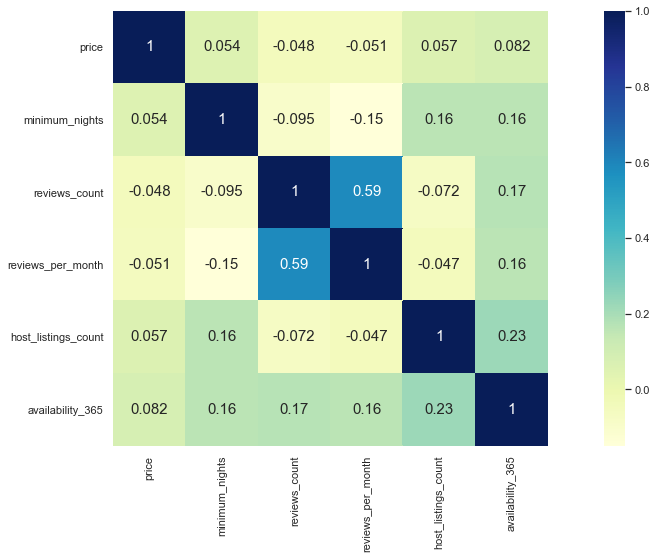

In [39]:
# get correlation matrix for numerical columns
df_corr = df[['price', 'minimum_nights', 'reviews_count', 'reviews_per_month', 'host_listings_count', 'availability_365']].corr()

# draw heatmap
sns.heatmap(df_corr, annot = True, annot_kws = {'size': 15}, square = True, cmap = 'YlGnBu')

## from this observation, we can conclude that most of the numerical features do not really have strong correlations with each other directly, apart from review count & rate.

In [40]:
df.head()

,index,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,reviews_count,last_review,reviews_per_month,host_listings_count,availability_365,min_night_type
0,0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018.0,0.21,6,365,1-5 days
1,1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019.0,0.38,2,355,1-5 days
2,2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,Never,0.00,1,365,1-5 days
3,3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019.0,4.64,1,194,1-5 days
4,4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018.0,0.10,1,0,1-2 weeks


In [41]:
# create function so that it can be reused as a base for map
# visualize the amount of listing clusters in NYC

def draw_map():
    nyc = [df.latitude.mean(), df.longitude.mean()]
    boroughs = df.groupby('neighbourhood_group').mean().reset_index()
    boroughs_name = boroughs['neighbourhood_group'].values.tolist()
    boroughs_loc = boroughs[['latitude', 'longitude']].values.tolist()

    base_map = fl.Map(location = nyc, control_scale = True, zoom_start = 11, tiles = 'OpenStreetMap')

    for i in range(len(boroughs_name)):
        attr = {'fill': 'midnightblue', 'font-weight': 'bold', 'font-size': '20'}
        pl = fl.PolyLine([[boroughs_loc[i][0], boroughs_loc[i][1]-.1], [boroughs_loc[i][0], boroughs_loc[i][1]+.1]], weight = 15, color = 'rgb(255,255,255, 0)')
        base_map.add_child(pl)
        base_map.add_child(PolyLineTextPath(pl, text = boroughs_name[i], attributes = attr, center = True))
    
    return base_map

base_map = draw_map()    
base_map.add_child(HeatMap(data = df[['latitude', 'longitude']], min_opacity = 0.2, radius = 15, blur = 40))
base_map.add_child(fl.ClickForMarker(popup='High amount of listings'))

## Manhattan and Brooklyn have the most amount of listing options available

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

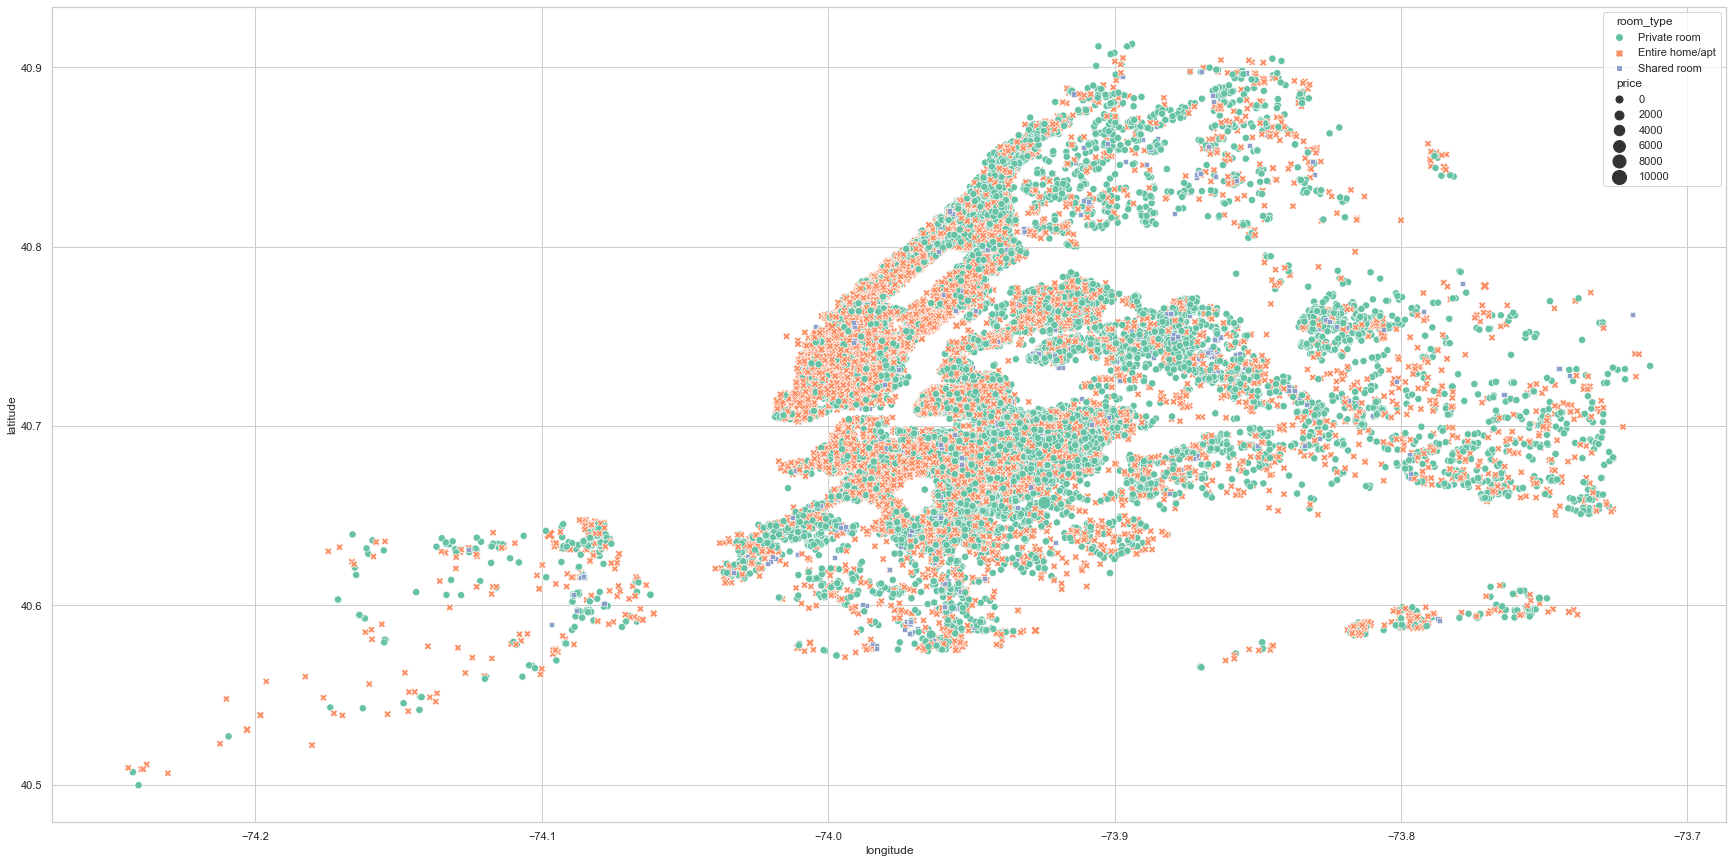

In [42]:
# view the cluster of room types available
# folium visual map is not used as the cluster colours blend, preventing from differentiating the room types

plt.figure(figsize = (30, 15))
sns.scatterplot(x = 'longitude', y = 'latitude', data = df, hue = 'room_type', size = 'price', sizes = (50, 200), style = 'room_type')

## There are very few shared rooms available compared to private rooms & entire homes

<AxesSubplot:xlabel='neighbourhood_group', ylabel='reviews_count'>

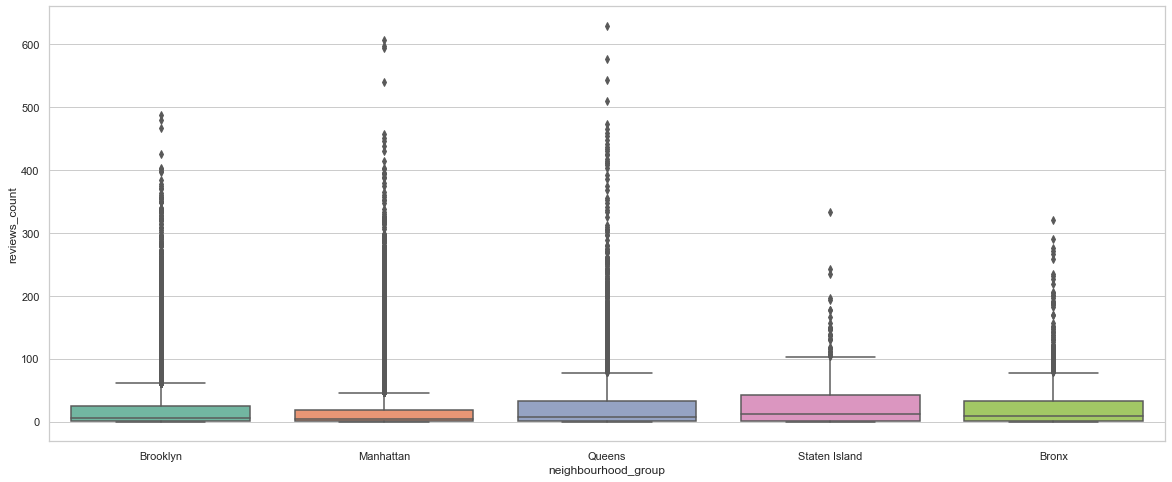

In [43]:
# check if 'review_counts' have many outliers
sns.boxplot(x = 'neighbourhood_group', y = 'reviews_count', data = df)

## has many outliers

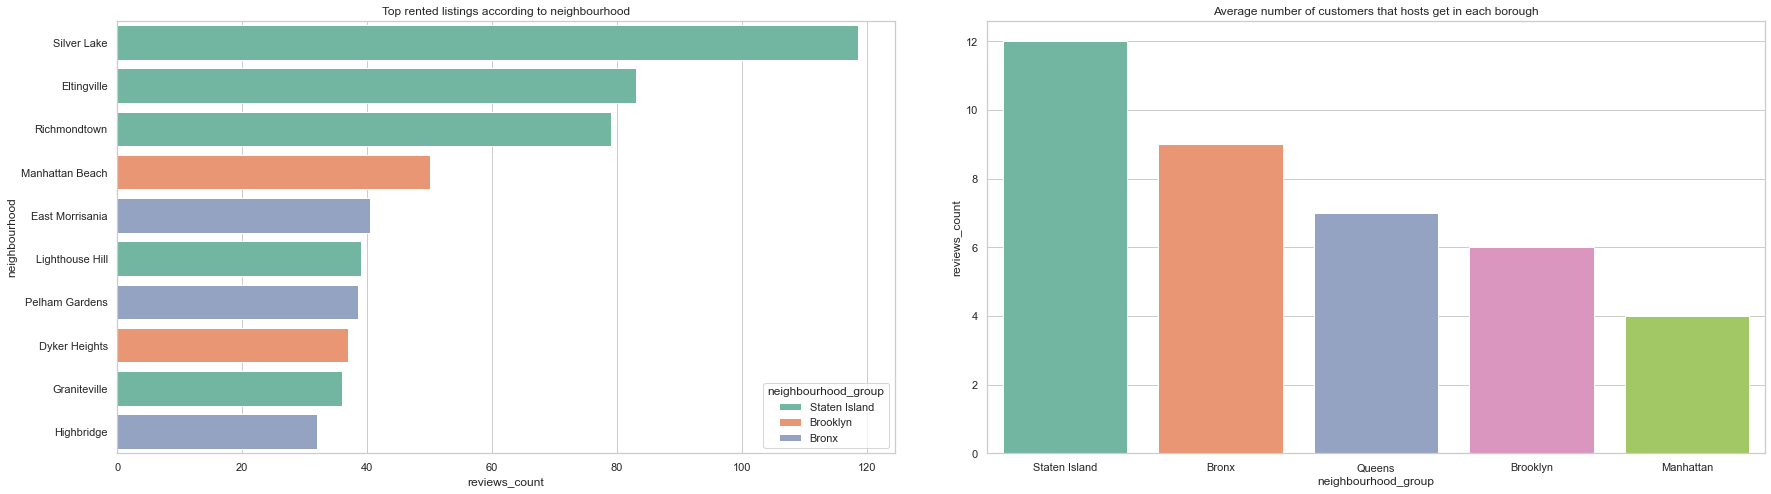

In [44]:
# since 'review_counts' have many outliers, we should use median instead of mean as the measure of central tendency.

top_listings = df.groupby('neighbourhood_group').median().sort_values(by = 'reviews_count', ascending = False).reset_index()
top10_listings = df.groupby(['neighbourhood_group', 'neighbourhood']).median().sort_values(by = 'reviews_count', ascending = False).reset_index().head(10)

fig, axis = plt.subplots(1, 2, figsize = (25, 8), squeeze = True)
fig.tight_layout(pad = 5)
sns.barplot(x = 'reviews_count', y = 'neighbourhood', data = top10_listings, orient = 'h', ci = False, hue = 'neighbourhood_group', dodge = False, ax = axis[0], estimator = np.median).set(title = 'Top rented listings according to neighbourhood')
sns.barplot(x = 'neighbourhood_group', y = 'reviews_count', data = top_listings, ci = False, dodge = False, ax = axis[1]).set(title = 'Average number of customers that hosts get in each borough')
plt.show()

## From the below observations, we can conclude that hosts in Staten Island are the most busy, in terms of getting customers
## Silver Lake, Eltingville and Richmondtown seems to be the top 3 hotspots for hosts to get many customers

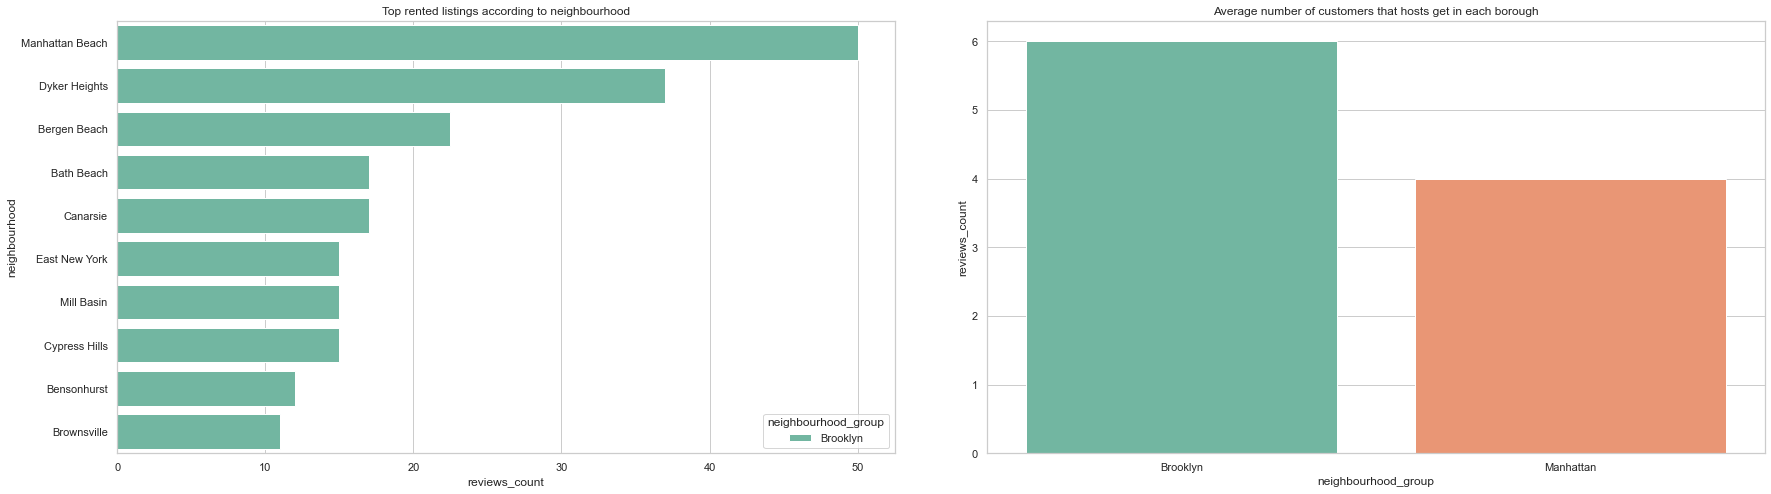

In [45]:
# Investigate which hosts in Manhattan & Brooklyn have the most customers as they have the highest amount of listing options

top_listings = df.loc[(df.neighbourhood_group == 'Manhattan') | (df.neighbourhood_group == 'Brooklyn')].groupby('neighbourhood_group').median().sort_values(by = 'reviews_count', ascending = False).reset_index()
top10_listings = df.loc[(df.neighbourhood_group == 'Manhattan') | (df.neighbourhood_group == 'Brooklyn')].groupby(['neighbourhood_group', 'neighbourhood']).median().sort_values(by = 'reviews_count', ascending = False).reset_index().head(10)

fig, axis = plt.subplots(1, 2, figsize = (25, 8), squeeze = True)
fig.tight_layout(pad = 5)
sns.barplot(x = 'reviews_count', y = 'neighbourhood', data = top10_listings, orient = 'h', ci = False, hue = 'neighbourhood_group', dodge = False, ax = axis[0], estimator = np.median).set(title = 'Top rented listings according to neighbourhood')
sns.barplot(x = 'neighbourhood_group', y = 'reviews_count', data = top_listings, ci = False, dodge = False, ax = axis[1]).set(title = 'Average number of customers that hosts get in each borough')
plt.show()

# Brooklyn hosts tops this one, with Manhattan Beach, Dyker Heights & Bergen Beach being the common locations

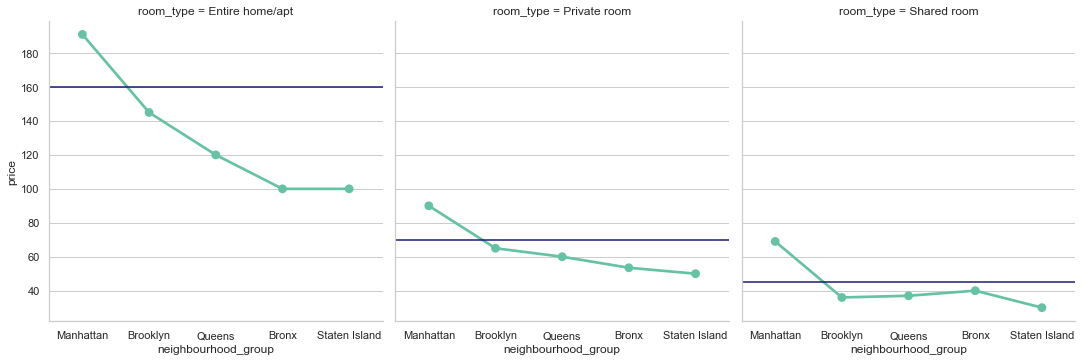

In [46]:
# inspect the price differences for each borough
avg_roomtype_cost = df.groupby('room_type').price.median()
top_price = df.groupby(['neighbourhood_group', 'room_type']).median().sort_values(by = 'price', ascending = False).reset_index()

g = sns.catplot(x = 'neighbourhood_group', y = 'price', data = top_price, ci = False, estimator = np.median, kind = 'point', col = 'room_type')

for i in range(len(avg_roomtype_cost)):
    g.axes[0][i].axhline(avg_roomtype_cost[i], color = 'midnightblue')

plt.show()

# as we can see, Manhattan has the most expensive listing offers for all room_types
# on the other hand, Staten Island has the cheapest listings. This further reinforces the previous observations we made as to why each Staten Island hosts get alot of customers.

In [47]:
# aggregate to view and compare the listings count with reviews count. View rental rate as well.
host_count = df.groupby('neighbourhood_group').count().sort_values('index', ascending = False).reset_index()[['neighbourhood_group', 'index']].rename(columns = {'index': 'listings_count'})
customer_count = df.groupby('neighbourhood_group').sum().sort_values('reviews_count', ascending = False).reset_index()[['neighbourhood_group', 'reviews_count']]
borough_data = host_count.merge(customer_count, left_on = 'neighbourhood_group', right_on = 'neighbourhood_group', how = 'left')
borough_data['rental_rate'] = (borough_data.reviews_count / borough_data.listings_count).round(2)
borough_data

,neighbourhood_group,listings_count,reviews_count,rental_rate
0,Manhattan,21655,454565,20.99
1,Brooklyn,20098,486534,24.21
2,Queens,5664,156920,27.70
3,Bronx,1091,28371,26.00
4,Staten Island,373,11541,30.94


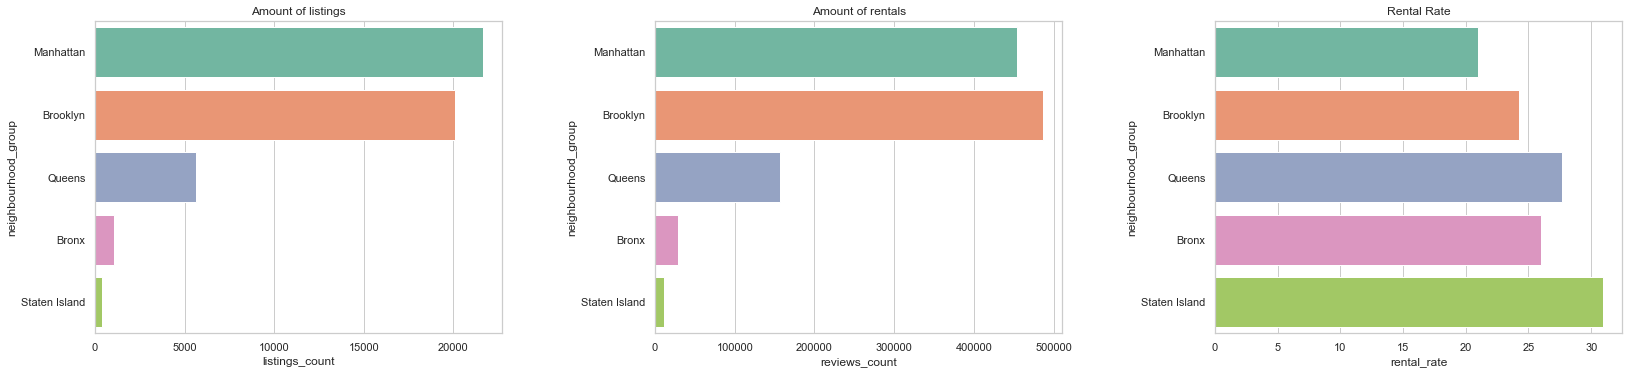

In [48]:
# visualise the comparison for listings and reviews
fig, axis = plt.subplots(1, 3, figsize = (25, 8), squeeze = True)
fig.tight_layout(pad = 10)

sns.barplot(x = 'listings_count', y = 'neighbourhood_group', data = borough_data, orient = 'h', ci = False, estimator = np.median, ax = axis[0]).set(title = 'Amount of listings')
sns.barplot(x = 'reviews_count', y = 'neighbourhood_group', data = borough_data, orient = 'h', ci = False, estimator = np.median, ax = axis[1]).set(title = 'Amount of rentals')
sns.barplot(x = 'rental_rate', y = 'neighbourhood_group', data = borough_data, orient = 'h', ci = False, estimator = np.median, ax = axis[2]).set(title = 'Rental Rate')
plt.show()

## As seen earlier, Manhattan & Brooklyn has more listings, but as we look at the rental rate. In average, Staten Island & Queens hosts are able to secure customers at a better rate compared to the other boroughs.

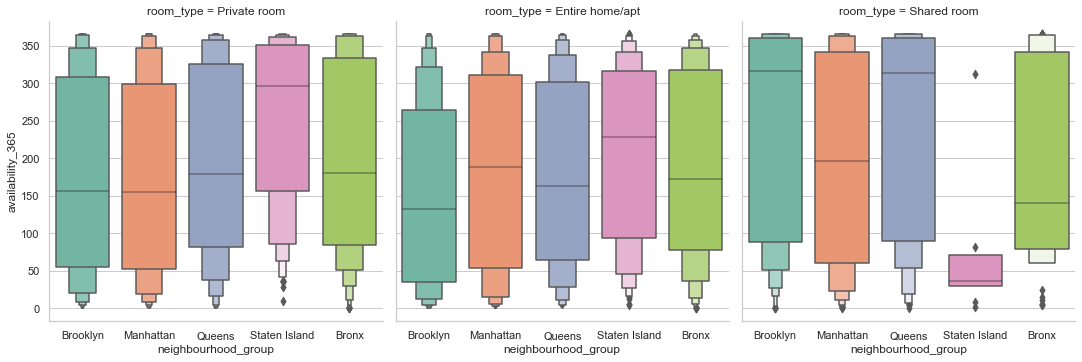

In [49]:
# inspect the availability of listings according to each borough and room type

sns.catplot(x = 'neighbourhood_group', y = 'availability_365', data = df.loc[df.availability_365 > 0], ci = False, estimator = np.median, kind = 'boxen', col = 'room_type')

## For private rooms, most Staten Island listings have them available throughout the whole year compared to the other boroughs.
## Entire homes in NYC are generally not available for the whole year, and more towards the 6 months mark.
## For shared rooms, Brooklyn & Queens have them available through out most of the year, while Staten Island and Bronx have them for only a couple months in a year.

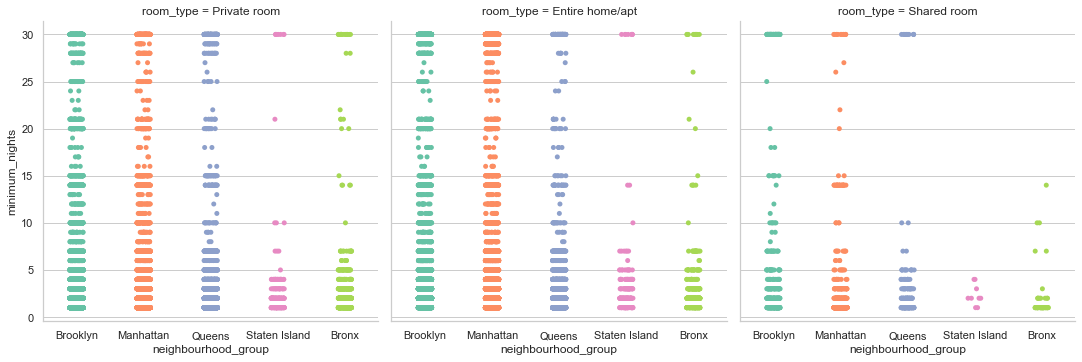

In [50]:
# inspect the minimum nights for listings in terms of room type and borough
# consider those that are 30 days or less, since higher is more uncommon in general
sns.catplot(x = 'neighbourhood_group', y = 'minimum_nights', data = df.loc[df.minimum_nights <= 30], ci = False, estimator = np.median, kind = 'strip', col = 'room_type')

## Staten Island listings tend to have very low minimum night requirements, which means that many vistors do not have to stay for long.

<AxesSubplot:xlabel='reviews_per_month', ylabel='price'>

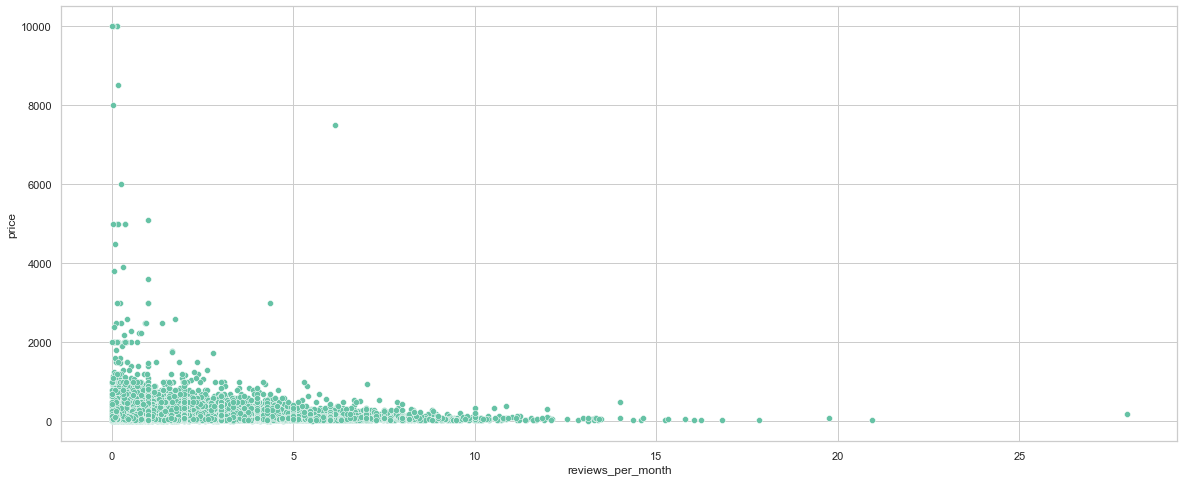

In [51]:
# view the trend for reviews per month against price. Ignore rates above 30 as they could potentially be invalid.

sns.scatterplot(x = 'reviews_per_month', y = 'price', data = df.loc[(df.reviews_count > 0) & (df.reviews_per_month <= 30)].sort_values('reviews_count', ascending = False))

# exponential trend where extreme high prices have a very low review rate while lower prices have a variety of rates.

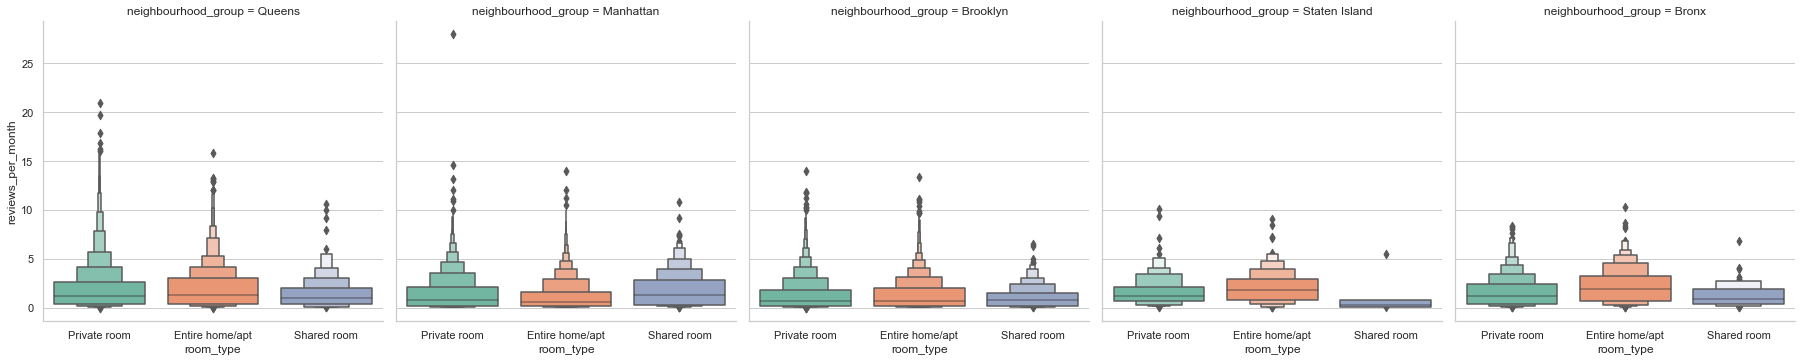

In [52]:
# inspect the review rate for each room type in the different boroughs

sns.catplot(x = 'room_type', y = 'reviews_per_month', data = df.loc[(df.reviews_count > 0) & (df.reviews_per_month <= 30)].sort_values('reviews_count', ascending = False), ci = False, estimator = np.median, kind = 'boxen', col = 'neighbourhood_group')

## Althoough Manhattan has alot of private rooms & entire homes available, many people tend to opt for the shared rooms.
## Entire homes seem to be the go to option for most visitors in Staten Island and Bronx.

### Hypothesis Test for Significance (Mann Whitney U Test)

Since the reviews_per_month does not have a gaussian distribution, we will use the 'Mann Whitney U Test' which is the nonparametric equivalent of the 'Two Sample t-test', and we can therefore focus on the medians of the two groups rather than the mean.

<b>Is there a significant difference between reviews_per_month for hosts of 'shared rooms' and 'private rooms'?</b>
> H<sub>0</sub>: There is no significant difference between the medians of the two groups

> H<sub>a</sub>: There is a significant difference between the medians of the two groups

> Significance Level, α = 0.05

C:\Users\Admin\new anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\new anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


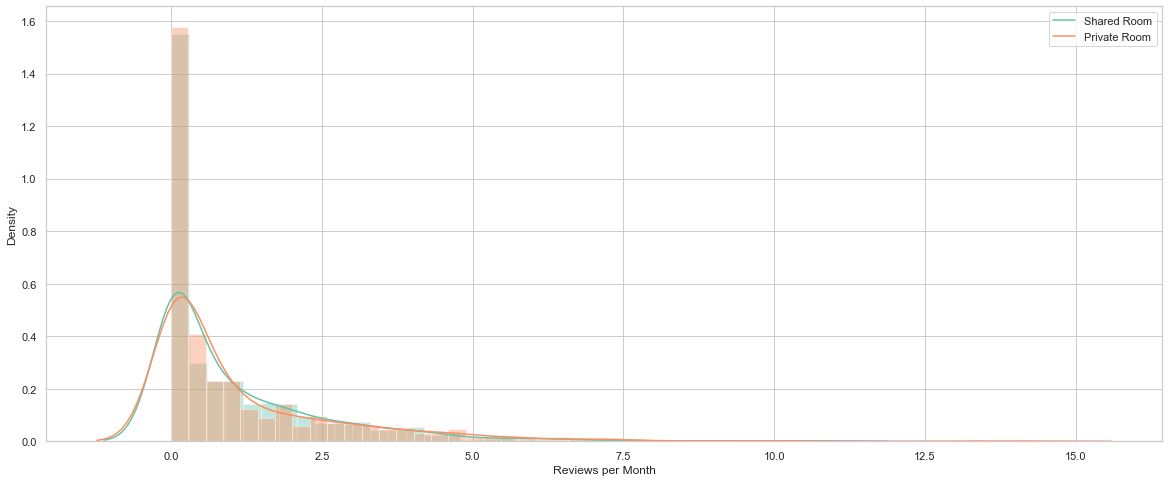

In [53]:
# get the list for each group and using sampling for private rooms, to ensure equal sample size
shared_rooms = df.loc[df.room_type == 'Shared room']['reviews_per_month'].values.tolist()
private_rooms = df.loc[df.room_type == 'Private room'].sample(len(shared_rooms), replace = False, random_state = 1)['reviews_per_month'].values.tolist()

# view the distribution for each group
sns.distplot(shared_rooms)
sns.distplot(private_rooms)
plt.xlabel('Reviews per Month')
plt.legend(['Shared Room', 'Private Room'])

plt.show()

## we can see that both groups have a right skewed distribution, so we can proceed with the test

In [54]:
# create general function to get the result for Mann Whitney U Test
def mann_whitney_u_test(d1, d2):
    u_stat, p_val = ss.mannwhitneyu(d1, d2)
    return u_stat, f'{p_val:.20f}'

mann_whitney_u_test(shared_rooms, private_rooms)

## we can see that the p-value is around 0.108, which is higher than our significance level. So we FAIL to reject the null hypothesis

(651845.0, '0.10823722231466176291')

### End of Analysis